In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
import sklearn
sklearn. __version__

'1.0'

In [3]:
df = pd.read_csv('C:/Users/faust/Desktop/Portfolio Projects/Python Insurance Project/insurance.csv')
df.head(), df.tail()

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
       age     sex    bmi  children smoker     region     charges
 1333   50    male  30.97         3     no  northwest  10600.5483
 1334   18  female  31.92         0     no  northeast   2205.9808
 1335   18  female  36.85         0     no  southeast   1629.8335
 1336   21  female  25.80         0     no  southwest   2007.9450
 1337   61  female  29.07         0    yes  northwest  29141.3603)

#### Column details

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1) Data Cleaning

#### Percentage of missing  values

In [5]:
df.isna().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

#### Duplicates

In [6]:
duplicates = df[df.duplicated()]
duplicates.shape

(1, 7)

#### Outliers search for 'charges'

About the possible outliers finded with quantile: \
We observe that those individuals all are **smokers** with also **bmi > 30**, and because there's a **high correlation between smokers, high bmi and charges**, we choose to just not removing them from the data set.


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


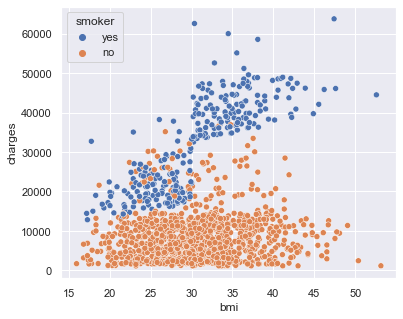

In [8]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="bmi", y="charges", hue='smoker')
plt.show()

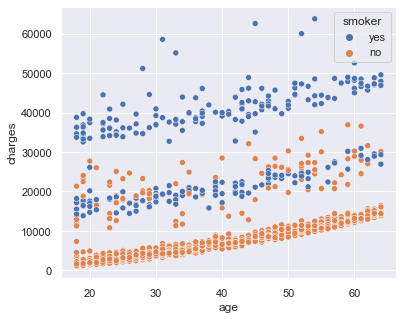

In [9]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.show()

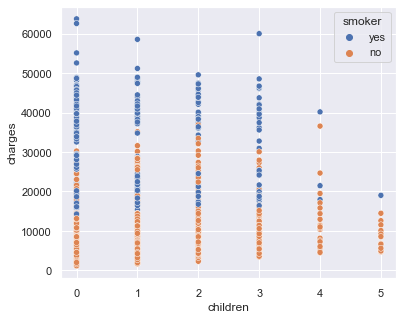

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='children', y='charges', hue='smoker')
plt.show()

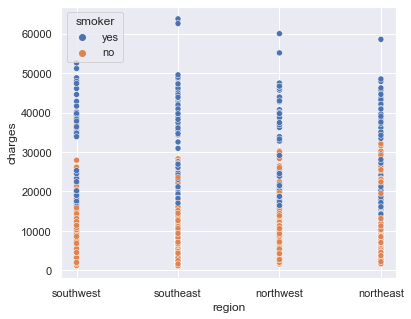

In [11]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='region', y='charges', hue='smoker')
plt.show()

In [12]:
# Using quantile for outliers check

q1 = df.charges.quantile(0.15)
q3 = df.charges.quantile(0.85)
q1, q3

(3171.836605, 24990.166995500007)

In [13]:
iqr = q3 - q1
iqr

21818.330390500007

In [14]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(-29555.65898075001, 57717.66258125001)

In [15]:
# Posible Outliers
df[(df.charges<lower_limit)|(df.charges>upper_limit)]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


### 2) Exploratory Data Analysis

#### Charges Distribution

<Figure size 432x360 with 0 Axes>

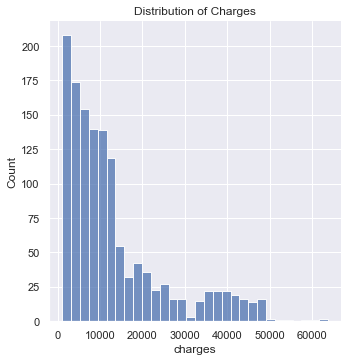

In [16]:
plt.figure(figsize=(6,5))

sns.displot(data=df, x='charges')
plt.title('Distribution of Charges')
plt.show()

#### Comparison between 'charges' and  'smoker' with the rest of the features

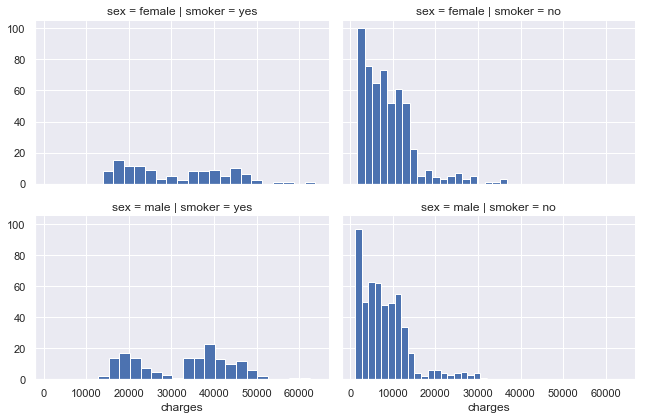

In [17]:
# Charges and Smoker with Sex

g = sns.FacetGrid(df, col='smoker', row='sex', height=3, aspect=1.5)
g.map(plt.hist, 'charges', bins=20)
g.add_legend()
plt.show()

<AxesSubplot:xlabel='region', ylabel='charges'>

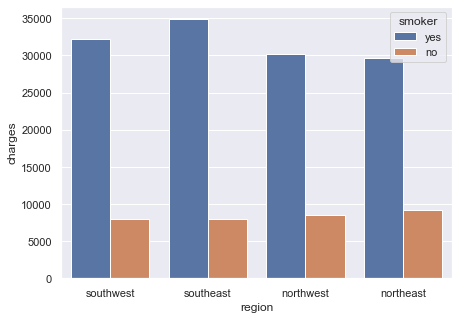

In [18]:
# Charges and Smoker with Region

plt.figure(figsize=(7,5))
sns.barplot(data=df, x='region', y='charges', hue='smoker', ci=None)

<AxesSubplot:xlabel='children', ylabel='charges'>

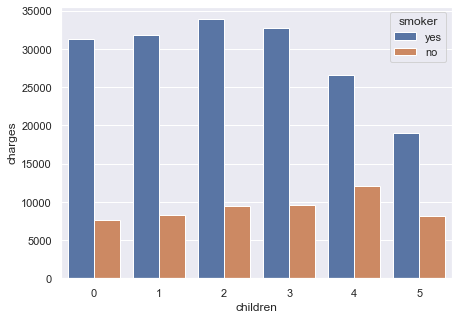

In [19]:
# Charges and Smoker with Children

plt.figure(figsize=(7,5))
sns.barplot(data=df, x='children', y='charges', hue='smoker', ci=None)


<Figure size 504x360 with 0 Axes>

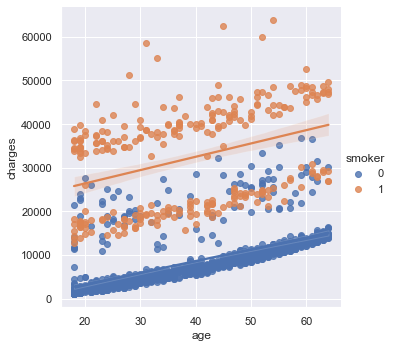

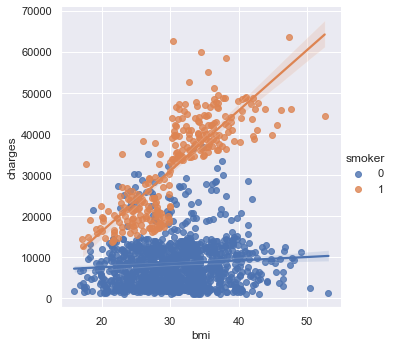

In [128]:
# Charges and Smoker with Age and BMI

plt.figure(figsize=(7,5))
ax1 = sns.lmplot(data=df, x='age', y='charges', hue='smoker')
ax2 = sns.lmplot(data=df, x='bmi', y='charges', hue='smoker')

In [21]:
##Converting objects labels into categorical

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')


In [22]:
# Converting category labels into numerical with Lable Encoder
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)


<AxesSubplot:>

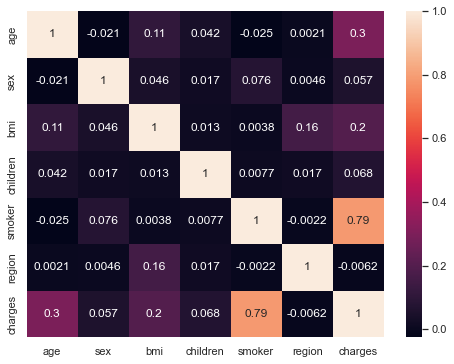

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

#### EDA Conclusion:
1) No matter what smokers will always have higher charges for medical insurrance. \
2) In second place we see aging having a positive correlation with high charges in medical insurance. \
3) The last one in third place we observe that BMI has a slightly positive correlation with high charges in medical insurance. \
4) Number of children, region and sex has low and even negative relationship with charges

### 3) Choosing the best ML model

#### Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = df.drop(['charges'], axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred = linear_reg.predict(x_test)
linear_reg_score = round(linear_reg.score(x_test, y_test)*100, 2)
print(linear_reg.intercept_)
print(linear_reg.coef_)
print(linear_reg_score)

-11261.138825163938
[ 2.50537556e+02  3.65092141e+00  3.22881906e+02  4.50147445e+02
  2.36021161e+04 -3.41244000e+02]
79.63


#### Ridge Regression

In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

model = Ridge()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [110]:
# Hyperparameters tunning 

scaler = StandardScaler()
# Standarize features
x_std = scaler.fit_transform(x_train)

# Random sample of possible good alpha values
random_sample = np.random.uniform(0, 15, size=(50,1)) 

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
space['alpha'] = random_sample
space['fit_intercept'] = [True, False]




# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -4277.823696625461
Best Hyperparameters: {'solver': 'cholesky', 'fit_intercept': True, 'alpha': array([0.82563103])}


In [111]:
Ridge = Ridge(alpha=0.62896248, solver='sparse_cg', fit_intercept=True)
Ridge.fit(x_train, y_train)
ridge_score = round(Ridge.score(x_test, y_test)*100, 2)
print(Ridge.intercept_)
print(Ridge.coef_)
print(ridge_score)

-11237.472681406902
[ 2.50394875e+02  8.72180722e+00  3.22829090e+02  4.50769115e+02
  2.35099932e+04 -3.41860871e+02]
79.61


#### Lasso Regression

In [112]:
from sklearn.metrics import r2_score, get_scorer
from sklearn.linear_model import Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split



In [113]:
# Hyperparameter Tunning

x_std = pd.DataFrame(data = x_std, columns = x_test.columns)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = gscv.fit(x_std, y_train)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -4268.86427
Config: {'alpha': 0.2}


In [114]:

Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000, tol=0.0001, warm_start=False,
              positive=False, random_state=None, selection='cyclic')

Lasso.fit(x_test, y_test)
lasso_score = round(Lasso.score(x_test, y_test)*100, 2)
print(Lasso.intercept_)
print(Lasso.coef_)
print(lasso_score)

-13658.133813084838
[  276.38597765  -541.22050778   370.80973848   602.22236183
 24388.08701188  -438.49300875]
79.9


#### Random Forest Regression

MSE train data: 3746684, MSE test data: 19965476
R2 train data: 0.974, R2 test data: 0.873
87.32


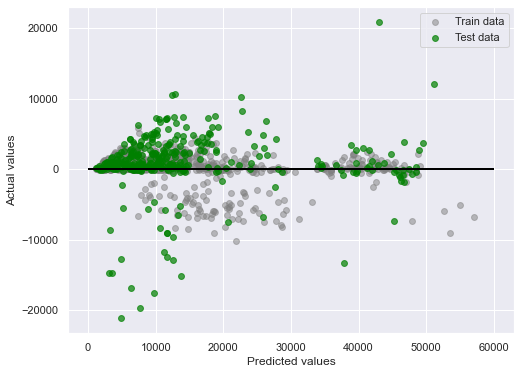

In [115]:
from sklearn.ensemble import RandomForestRegressor as rfr

Rfr = rfr(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)
Rfr.fit(x_train, y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %3.f, MSE test data: %3.f' %
     (metrics.mean_squared_error(x_train_pred, y_train),
     metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % (metrics.r2_score(y_train, x_train_pred),
                                                  metrics.r2_score(y_test, x_test_pred)))
rfr_score = round(Rfr.score(x_test, y_test)*100, 2)
print(rfr_score)

plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train, c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test, c = 'green', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'black')

#### Feature Importance Ranking

In [116]:
print('Feature Importance Ranking: ')
importances= Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

variables = df.drop(['charges'], axis=1).columns.tolist()
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

Feature Importance Ranking: 
1.smoker(0.603241)
2.bmi(0.213775)
3.age(0.138409)
4.children(0.021475)
5.region(0.016267)
6.sex(0.006833)


In [117]:
importance_list

['smoker', 'bmi', 'age', 'children', 'region', 'sex']

<BarContainer object of 6 artists>

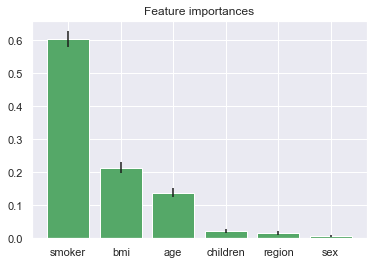

In [118]:
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="g", yerr=std[indices], align="center")

#### Polynomial Regression

In [125]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut


x = df.drop(['charges','region','sex'], axis = 1)
y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(x_train,y_train)

Y_train_pred = plr.predict(x_train)
Y_test_pred = plr.predict(x_test)

plr_score = round(plr.score(x_test,y_test)*100, 2)

print(plr.intercept_)
print(plr.coef_)
print(plr_score)

-6091.625248974562
[ 0.00000000e+00 -2.37540378e+01  5.55536763e+02  7.27238740e+02
 -9.48404113e+03  2.95401832e+00  1.54906304e+00  6.38827549e+00
  8.45556050e+00 -9.70936854e+00  6.07137821e+00  1.40153220e+03
 -1.30137713e+02 -4.85877608e+02 -9.48404113e+03]
88.5


#### Evaluating all Models

In [126]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regression', 'Polynomial Regression'],
    'Score': [linear_reg_score, ridge_score, lasso_score, rfr_score, plr_score]
})
models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Polynomial Regression,88.50
1,Random Forest Regression,87.32
2,Lasso Regression,79.90
3,Linear Regression,79.63
4,Ridge Regression,79.61


### 4) Coclusion
· **Smoking**, **high BMI** and **Age** are crucial factors in insurance cost, as also the most important features. \
· **Region**, **Sex** and **Children** have low or negative relationship with insurance cost. \
· **Polynomial Regression Model & Random Forest Regression** are the best fit for this dataset.